In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

def parse_movie_ratings_incremental(file_path):
    ratings_dict = {}
    current_movie_id = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.endswith(':'):
                current_movie_id = int(line[:-1])
            else:
                user_id, rating, date = line.split(',')
                user_id = int(user_id)
                rating = int(rating)
                if user_id not in ratings_dict:
                    ratings_dict[user_id] = {}
                ratings_dict[user_id][current_movie_id] = rating

    # Build DataFrame from dictionary of dictionaries
    return pd.DataFrame.from_dict(ratings_dict, orient='index').sort_index()

# Usage
file_path = 'dataSet/data.txt'
ratings_matrix = parse_movie_ratings_incremental(file_path)
print(ratings_matrix.head())



    1     8     17    30    44    58    76    80    81    83    ...  3346  \
6    NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
7    NaN   5.0   NaN   5.0   NaN   NaN   NaN   NaN   NaN   5.0  ...   NaN   
8    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

    2412  3750  98    2682  4806  4505  887   2618  3234  
6    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 5000 columns]


In [3]:
print (type (ratings_matrix))

<class 'pandas.core.frame.DataFrame'>


In [4]:
ratings_matrix.shape

(472542, 5000)

In [5]:
ratings_matrix.head()

,1,8,17,30,44,58,76,80,81,83,...,3346,2412,3750,98,2682,4806,4505,887,2618,3234
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movieTitles = pd.read_csv ('dataSet/movieTitles.csv', header = None)

In [7]:
movieTitles.head()

,0,1,2,3,4
0,1,2003.0,Dinosaur Planet,NaN,NaN
1,2,2004.0,Isle of Man TT 2004 Review,NaN,NaN
2,3,1997.0,Character,NaN,NaN
3,4,1994.0,Paula Abdul's Get Up & Dance,NaN,NaN
4,5,2004.0,The Rise and Fall of ECW,NaN,NaN


In [8]:
movies = movieTitles[2]

In [9]:
type (movies)

pandas.core.series.Series

In [10]:
ratings_matrix.columns = movies

In [11]:
ratings_matrix.head()

2,Dinosaur Planet,Isle of Man TT 2004 Review,Character,Paula Abdul's Get Up & Dance,The Rise and Fall of ECW,Sick,8 Man,What the #$*! Do We Know!?,Class of Nuke 'Em High 2,Fighter,...,Barbie and the Magic of Pegasus,Kathy Smith: Kickboxing Workout,Chicago with Earth,Snapshots,Crossroads,Gone in 60 Seconds,Alabama Love Story,Anna Karenina,Lucky Break,Getting Even with Dad
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Investigating Missing Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

non_missing_per_movie = ratings_matrix.notna().sum()

non_missing_per_user = ratings_matrix.notna().sum(axis=1)

plt.figure(figsize=(10, 5))
sns.histplot(non_missing_per_movie, bins=50, kde=False, color='blue',orientation='horizontal')
plt.title(' Ratings per Movie')
plt.xlabel('Number of  Ratings')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(non_missing_per_user, bins=50, kde=False, color='red', orientation='horizontal')
plt.title(' Ratings per User')
plt.xlabel('Number of  Ratings')
plt.ylabel('Number of Users')
plt.show()

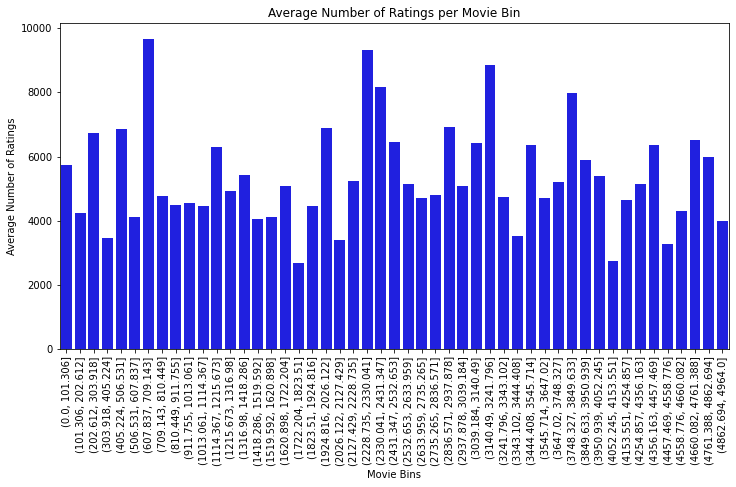

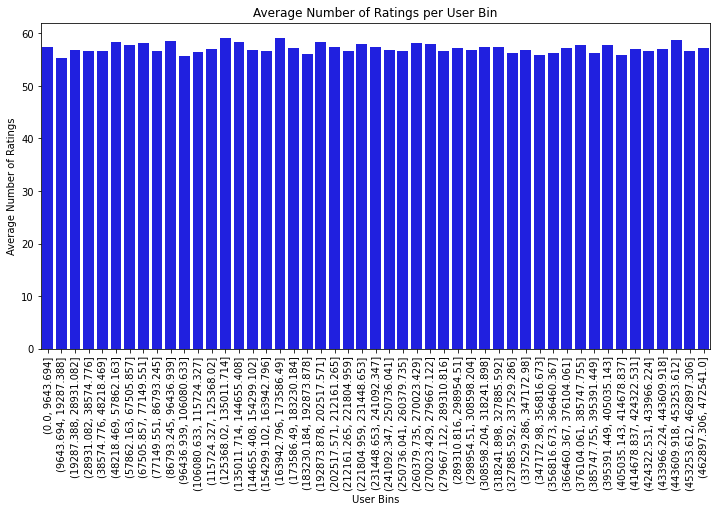

In [26]:


# Convert Series to DataFrame
movie_data = non_missing_per_movie.reset_index()
movie_data.columns = ['Movie', 'Ratings']

user_data = non_missing_per_user.reset_index()
user_data.columns = ['User', 'Ratings']


# Group by 'Movie' and calculate mean ratings
average_ratings_per_movie = movie_data.groupby('Movie')['Ratings'].mean().reset_index()
average_ratings_per_movie['Movie'] = pd.Categorical(average_ratings_per_movie['Movie'])
average_ratings_per_movie['Movie Codes'] = average_ratings_per_movie['Movie'].cat.codes

# Create bins based on numeric codes for movies since they are originally strings
bins = np.linspace(0, average_ratings_per_movie['Movie Codes'].max(), 50)
average_ratings_per_movie['Movie Bins'] = pd.cut(average_ratings_per_movie['Movie Codes'], bins=bins)

# Aggregate the data based on bins
average_ratings_per_movie_bin = average_ratings_per_movie.groupby('Movie Bins')['Ratings'].mean().reset_index()
average_ratings_per_movie_bin['Movie Bins'] = average_ratings_per_movie_bin['Movie Bins'].astype(str)

# Plotting the average ratings per movie bin
plt.figure(figsize=(12, 6))
sns.barplot(x='Movie Bins', y='Ratings', data=average_ratings_per_movie_bin, color='blue')
plt.title('Average Number of Ratings per Movie Bin')
plt.xlabel('Movie Bins')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=90)
plt.show()



# Group by 'Movie' and calculate mean ratings
average_ratings_per_movie = user_data.groupby('User')['Ratings'].mean().reset_index()
average_ratings_per_movie['User'] = pd.Categorical(average_ratings_per_movie['User'])
average_ratings_per_movie['User Codes'] = average_ratings_per_movie['User'].cat.codes

# Create bins based on numeric codes for movies since they are originally strings
bins = np.linspace(0, average_ratings_per_movie['User Codes'].max(), 50)
average_ratings_per_movie['User Bins'] = pd.cut(average_ratings_per_movie['User Codes'], bins=bins)

# Aggregate the data based on bins
average_ratings_per_movie_bin = average_ratings_per_movie.groupby('User Bins')['Ratings'].mean().reset_index()
average_ratings_per_movie_bin['User Bins'] = average_ratings_per_movie_bin['User Bins'].astype(str)

# Plotting the average ratings per movie bin
plt.figure(figsize=(12, 6))
sns.barplot(x='User Bins', y='Ratings', data=average_ratings_per_movie_bin, color='blue')
plt.title('Average Number of Ratings per User Bin')
plt.xlabel('User Bins')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=90)
plt.show()





In [13]:
ratings_series = ratings_matrix.values.flatten()

null_ratings = np.isnan(ratings_series).sum()

null_ratings_percent = (null_ratings / ratings_series.size) * 100

ratings_counts = pd.Series(ratings_series).value_counts(normalize=True) * 100

print(f"Total number of null ratings: {null_ratings}")
print(f"Percentage of null ratings: {null_ratings_percent:.2f}%")
print("Percentage of each rating from 1 to 5:")
print(ratings_counts)

Total number of null ratings: 2335699775
Percentage of null ratings: 98.86%
Percentage of each rating from 1 to 5:
4.0    33.592353
3.0    28.889878
5.0    22.610052
2.0    10.231381
1.0     4.676336
dtype: float64


Text(0, 0.5, 'Percentage')

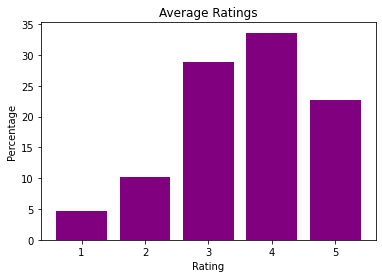

In [14]:
plt.bar(ratings_counts.index, ratings_counts.values, color='purple')
plt.title ("Average Ratings")
plt.xlabel('Rating')
plt.ylabel('Percentage')

In [15]:
num_columns_all_missing = ratings_matrix.isnull().all().sum()

print(f"Number of columns with all missing values: {num_columns_all_missing}")

Number of columns with all missing values: 0


In [16]:
non_missing_per_column = ratings_matrix.notnull().sum()

In [17]:
minimum_rating_count = non_missing_per_column.min()
maximum_rating_count = non_missing_per_column.max()

# Get the index position of the minimum and maximum non-missing ratings count
min_rating_index = non_missing_per_column.idxmin()
max_rating_index = non_missing_per_column.idxmax()

print("Minimum Ratings Count: ", minimum_rating_count)
print("Column with fewest Ratings: ", min_rating_index)
print("Maximum Ratings Count: ", maximum_rating_count)
print("Column with Maximum Ratings: ", max_rating_index)

Minimum Ratings Count:  13
Column with fewest Ratings:  Gone in 60 Seconds
Maximum Ratings Count:  193941
Column with Maximum Ratings:  The Cookout


In [18]:
non_missing_per_column.describe()

count      5000.000000
mean       5402.045000
std       16260.702786
min          13.000000
25%         191.000000
50%         548.000000
75%        2556.250000
max      193941.000000
dtype: float64

In [19]:
non_missing_per_row = ratings_matrix.notnull().sum(axis = 1)
max_movies_watched = non_missing_per_row.max()
min_movies_watched = non_missing_per_row.min()


print("Maximum Movies Watched: ", max_movies_watched)
print("Minimum Movies Watched: ", min_movies_watched)


Maximum Movies Watched:  4963
Minimum Movies Watched:  1


In [20]:
non_missing_per_row.describe()

count    472542.000000
mean         57.159417
std          83.403879
min           1.000000
25%          10.000000
50%          27.000000
75%          72.000000
max        4963.000000
dtype: float64

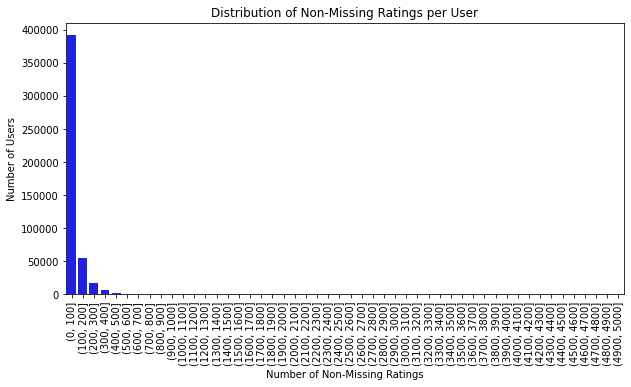

In [21]:
bins = np.arange(0, 5100, 100)

binned_data = pd.cut(non_missing_per_row, bins)

counts = binned_data.value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, color='blue')
plt.xticks(rotation=90)
plt.title('Distribution of Non-Missing Ratings per User')
plt.xlabel('Number of Non-Missing Ratings')
plt.ylabel('Number of Users')
plt.show()

Observations: 
- Avg user has watched 57 movies
- Avg movie has 5400 reviews

## Filtering Dataset 

### Attempt 1: Use 25% as threshold

In [22]:
users_to_keep = 10
movies_to_keep = 191

non_missing_per_user = ratings_matrix.notnull().sum(axis=1)
non_missing_per_movie = ratings_matrix.notnull().sum()

filtered_ratings_matrix = ratings_matrix.loc[non_missing_per_user >= users_to_keep, non_missing_per_movie >= movies_to_keep]

In [23]:
filtered_ratings_matrix.shape

(354477, 3753)

In [24]:
filtered_ratings_matrix.head()

2,Dinosaur Planet,Isle of Man TT 2004 Review,Character,Paula Abdul's Get Up & Dance,The Rise and Fall of ECW,Sick,8 Man,What the #$*! Do We Know!?,Class of Nuke 'Em High 2,Fighter,...,The Flame Trees of Thika,Damage,The Trench,The Great Outdoors,Kathy Smith: Kickboxing Workout,Chicago with Earth,Crossroads,Alabama Love Story,Anna Karenina,Lucky Break
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings_series = filtered_ratings_matrix.values.flatten()

null_ratings = np.isnan(ratings_series).sum()

null_ratings_percent = (null_ratings / ratings_series.size) * 100

ratings_counts = pd.Series(ratings_series).value_counts(normalize=True) * 100

print(f"Total number of null ratings: {null_ratings}")
print(f"Percentage of null ratings: {null_ratings_percent:.2f}%")
print("Percentage of each rating from 1 to 5:")
print(ratings_counts)

Total number of null ratings: 1304064166
Percentage of null ratings: 98.02%
Percentage of each rating from 1 to 5:
4.0    33.711381
3.0    29.010547
5.0    22.517238
2.0    10.194676
1.0     4.566157
dtype: float64


Text(0.5, 0, 'Rating')

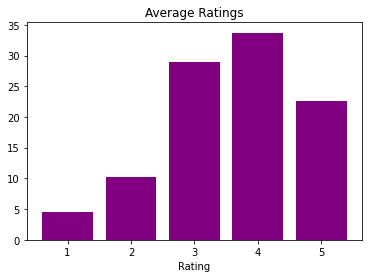

In [26]:
plt.bar(ratings_counts.index, ratings_counts.values, color='purple')
plt.title ("Average Ratings")
plt.xlabel('Rating')

In [27]:
filtered_ratings_matrix.to_csv ("Filtered_by_quantile.csv")

### Attempt 2: Using Average 

In [33]:
users_to_keep = 30
movies_to_keep = 600

filtered_ratings_matrix_two = ratings_matrix.loc[non_missing_per_user >= users_to_keep, non_missing_per_movie >= movies_to_keep]

In [34]:
filtered_ratings_matrix_two.shape

(224643, 2403)

In [35]:
ratings_series = filtered_ratings_matrix_two.values.flatten()

null_ratings = np.isnan(ratings_series).sum()

null_ratings_percent = (null_ratings / ratings_series.size) * 100

ratings_counts = pd.Series(ratings_series).value_counts(normalize=True) * 100

print(f"Total number of null ratings: {null_ratings}")
print(f"Percentage of null ratings: {null_ratings_percent:.2f}%")
print("Percentage of each rating from 1 to 5:")
print(ratings_counts)

Total number of null ratings: 516248907
Percentage of null ratings: 95.63%
Percentage of each rating from 1 to 5:
4.0    33.927040
3.0    29.448365
5.0    22.110667
2.0    10.166193
1.0     4.347736
dtype: float64


### For now: Save as CSV

In [36]:
filtered_ratings_matrix_two.to_csv ("Filtered_Data.csv")

### Filtered Dataset Analysis

Total entries: 1330706658
Missing entries: 1304064166


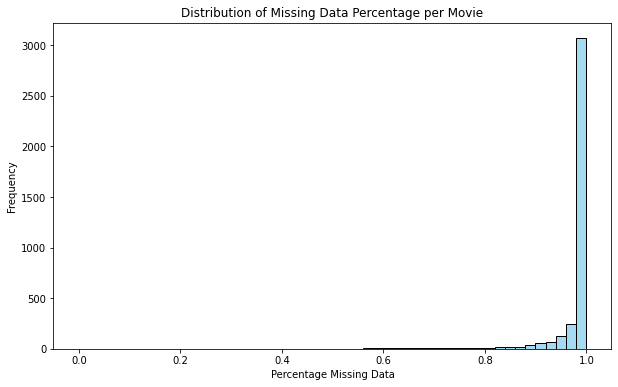

In [27]:
filtered_df = pd.read_csv("Filtered_by_quantile.csv")

# Basic info on missing data
print("Total entries:", np.product(filtered_df.shape))
print("Missing entries:", filtered_df.isnull().sum().sum())

# Percentage of missing data per movie
missing_data_per_movie = filtered_df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(missing_data_per_movie, bins=50, kde=False, color='skyblue')
plt.title('Distribution of Missing Data Percentage per Movie')
plt.xlabel('Percentage Missing Data')
plt.ylabel('Frequency')
plt.show()


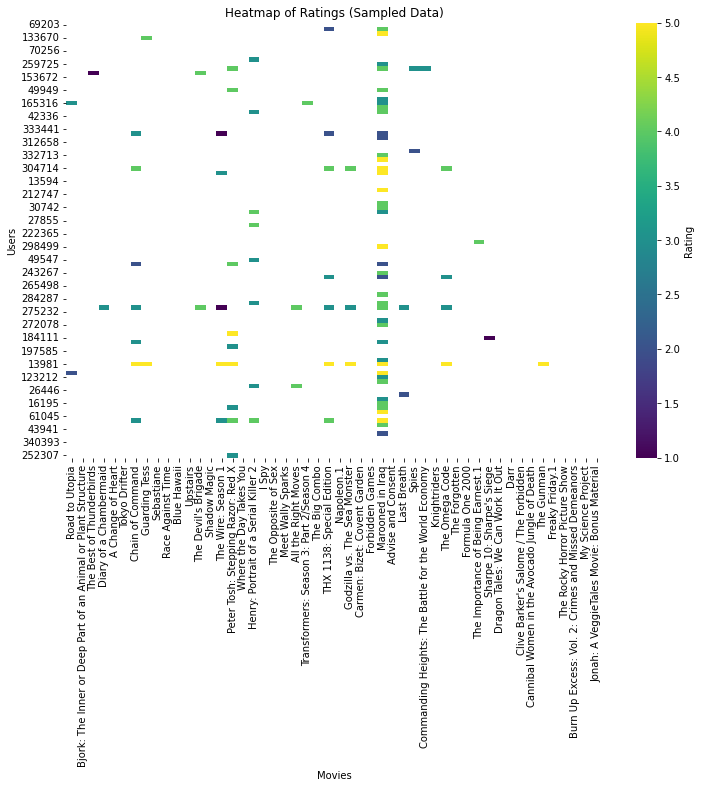

In [28]:
# Sampling a subset of data for visualization (let's take 100 users and 50 movies)
sampled_data = filtered_df.sample(100, axis=0).sample(50, axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(sampled_data, cmap='viridis', cbar_kws={'label': 'Rating'})
plt.title('Heatmap of Ratings (Sampled Data)')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()

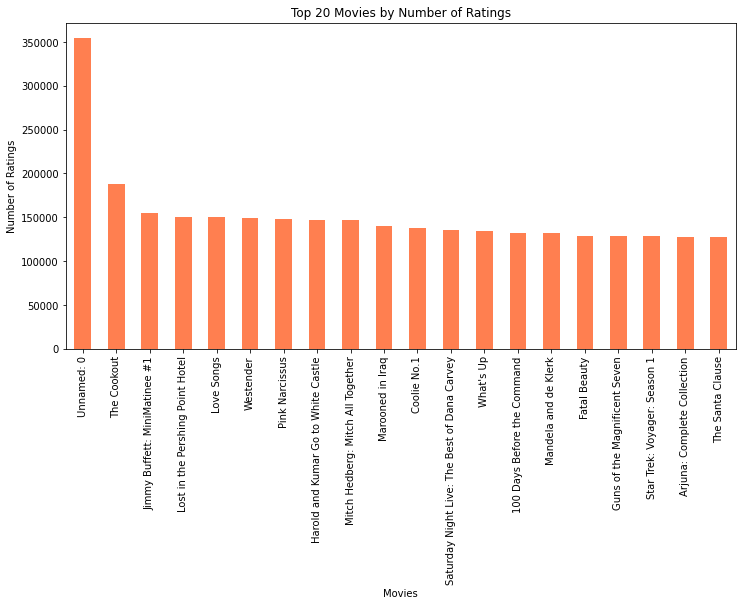

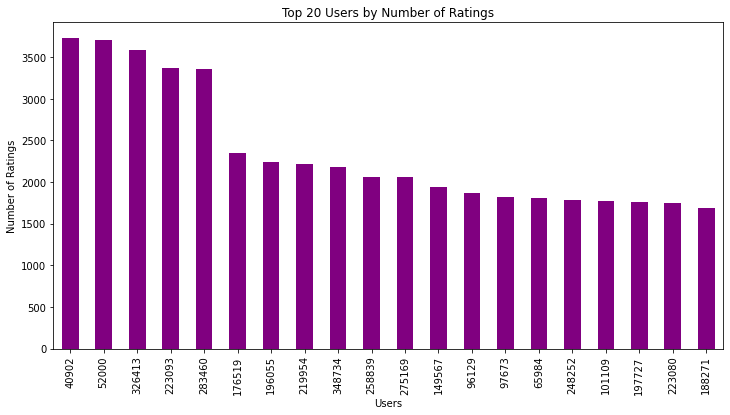

In [30]:
# Top 20 movies by number of ratings
top_movies = filtered_df.notnull().sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
top_movies.plot(kind='bar', color='coral')
plt.title('Top 20 Movies by Number of Ratings')
plt.xlabel('Movies')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

# Top 20 users by number of ratings
top_users = filtered_df.notnull().sum(axis=1).sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='purple')
plt.title('Top 20 Users by Number of Ratings')
plt.xlabel('Users')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


In [31]:
top_users = filtered_df.notnull().sum(axis=1).nlargest(20).index

top_users_ratings = filtered_df.loc[top_users]

average_ratings = top_users_ratings.mean().nlargest(5)

# Convert the result to a DataFrame for better presentation
top_movies_df = pd.DataFrame({
    'Movie': average_ratings.index,
    'Average Rating': average_ratings.values
})

In [32]:
top_movies_df

,Movie,Average Rating
0,Unnamed: 0,1.406064e+06
1,The Other Side of Heaven,5.000000e+00
2,Primus: Hallucino-Genetics Live 2004,4.666667e+00
3,The Cookout,4.250000e+00
4,100 Days Before the Command,4.222222e+00


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torch
np.random.seed(13456789)


# Define the movie recommender model
class MovieRecommender(nn.Module):
    def __init__(self, num_users, num_movies, embedding_size):
        super(MovieRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.movie_embedding = nn.Embedding(num_movies, embedding_size)
        self.fc1 = nn.Linear(embedding_size * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, user_indices, movie_indices):
        user_embedded = self.user_embedding(user_indices)
        movie_embedded = self.movie_embedding(movie_indices)
        x = torch.cat([user_embedded, movie_embedded], dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        return self.output(x)

# Data preparation
filtered_df = filtered_df.astype(np.float32)

# Prepare a test set

test_set = pd.DataFrame(index=range(1), columns=filtered_df.columns)
for movie in filtered_df.columns:
    valid_indices = filtered_df[movie].dropna().index
    if len(valid_indices) > 0:
        test_index = np.random.choice(valid_indices, size=1)[0]
        test_set.at[0, movie] = filtered_df.at[test_index, movie]
        filtered_df.at[test_index, movie] = np.nan
test_set.dropna(axis=1, how='all', inplace=True)

num_users, num_movies = filtered_df.shape
embedding_size = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MovieRecommender(num_users, num_movies, embedding_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print (device)


# Prepare training data
train_set = filtered_df
train_indices = np.argwhere(~np.isnan(train_set.values))
user_indices = torch.LongTensor(train_indices[:, 0])
movie_indices = torch.LongTensor(train_indices[:, 1])
ratings = torch.FloatTensor(train_set.values[train_indices[:, 0], train_indices[:, 1]])
train_data = TensorDataset(user_indices, movie_indices, ratings)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

def train(model, epochs, train_loader, criterion, optimizer, device):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for user_indices, movie_indices, ratings in train_loader:
            user_indices = user_indices.to(device)
            movie_indices = movie_indices.to(device)
            ratings = ratings.to(device)
            optimizer.zero_grad()
            outputs = model(user_indices, movie_indices).squeeze()
            loss = criterion(outputs, ratings)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * user_indices.size(0)
        epoch_loss /= len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_losses
train_losses = train(model, 5, train_loader, criterion, optimizer, device)
def plot_losses(train_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()






In [ ]:
def evaluate_rmse(model, test_set):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    criterion = torch.nn.MSELoss()
    movie_to_id = {movie: idx for idx, movie in enumerate(test_set.columns)}

    with torch.no_grad():
        test_users, test_movies, test_ratings = [], [], []
        for movie, movie_id in movie_to_id.items():
            for user in test_set.index:
                rating = test_set.at[user, movie]
                if not pd.isna(rating):  
                    test_users.append(int(user))
                    test_movies.append(movie_id)
                    test_ratings.append(rating)


        test_users = torch.LongTensor(test_users).to(device)
        test_movies = torch.LongTensor(test_movies).to(device)
        test_ratings = torch.FloatTensor(test_ratings).to(device)


        predictions = model(test_users, test_movies).squeeze()
        mse = criterion(predictions, test_ratings)
        rmse = torch.sqrt(mse).item()
        print(f"Test RMSE: {rmse}")


evaluate_rmse(model, test_set)
